In [ ]:

import numpy as np

import matplotlib.pyplot as plt 

import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
ruta = '/content/drive/My Drive/Colab Notebooks/Proyecto Mineria 2020'

In [ ]:
stars = pd.read_csv('%s/pulsar_stars.csv'%ruta)
stars.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## **6. PREPARACIÓN DE LOS DATOS**

In [ ]:
#Tratamiento de valores perdidos
stars.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [ ]:
# Análisis descriptivo de los datos (General)
stars.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [ ]:
# Análisis descriptivo de los datos (target_class=0)
stars[(stars.target_class == 0)].describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.0
mean,116.562726,47.339741,0.210440,0.380844,8.863258,23.287984,8.862674,113.620344,0.0
std,17.475932,6.182929,0.334606,1.027791,24.411409,16.651426,4.238626,106.721930,0.0
min,17.210938,28.698714,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.0
25%,105.253906,43.384645,0.008650,-0.221980,1.857023,14.138541,6.615374,47.580165,0.0
50%,117.257812,47.485647,0.186665,0.124107,2.635452,17.618420,8.760010,90.674592,0.0
75%,128.285156,51.315620,0.392892,0.663383,4.227007,24.517386,10.935207,145.827223,0.0
max,192.617188,98.778911,4.785786,24.872429,223.392140,110.642211,34.539844,1191.000837,0.0


In [ ]:
# Análisis descriptivo de los datos (target_class=1)
stars[(stars.target_class == 1)].describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.0
mean,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728,1.0
std,30.007707,8.033614,1.872861,13.997200,45.287932,19.731080,3.105945,50.896263,0.0
min,5.812500,24.772042,-0.094888,-1.139069,0.486622,7.658623,-1.862320,-1.874683,1.0
25%,31.777344,32.284803,1.556038,3.805492,12.759615,43.333643,0.756451,-0.228294,1.0
50%,54.296875,37.341297,2.961258,11.609644,33.494983,59.367088,1.918327,2.585145,1.0
75%,79.277344,43.759278,4.586930,24.881853,78.313545,70.985965,3.709978,13.469687,1.0
max,139.257812,83.796909,8.069522,68.101622,199.577759,109.655345,30.883882,1017.383180,1.0


In [ ]:
# Transformación de variables.
stars.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

## **7. MODELADO Y EVALUACIÓN**

### ***7.1 MODELADO***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# Separamos en dos variables (X e Y)
X = stars.drop('target_class', axis='columns')
Y = stars.target_class


# Separando los datos en sets de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)



### **Árboles de Decisión** -  *Criterio Gini*

In [ ]:
# Importando el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Creando el modelo con criterio 'gini'
arbolGini = DecisionTreeClassifier(criterion='gini') 

# Ajustando el modelo
arbolGini.fit(X_train, y_train)

print('Precisión modelo inicial train/test  {0:.6f}/{1:.6f}'
      .format(arbolGini.score(X_train, y_train), arbolGini.score(X_test, y_test)))

Precisión modelo inicial train/test  1.000000/0.968156


In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted_arbolGini = arbolGini.predict(X_test)
matrizC = confusion_matrix(y_test, y_predicted_arbolGini)
matrizC

array([[3214,   60],
       [  54,  252]])

Text(69.0, 0.5, 'Truth')

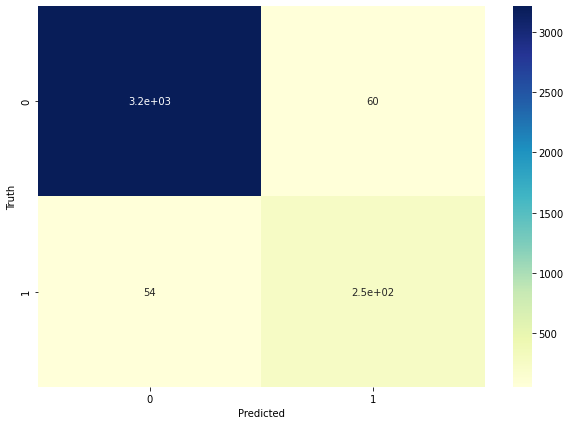

In [ ]:
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(matrizC, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

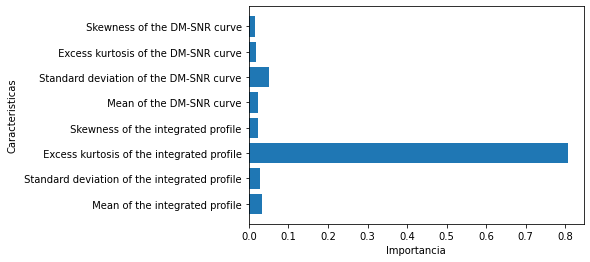

In [ ]:
caract = X.shape[1]
plt.barh(range(caract), arbolGini.feature_importances_)
plt.yticks(np.arange(caract), X.columns.values)
plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.show()

### **Árboles de Decisión** -  *Criterio Entropy*

In [ ]:
# Creando el modelo con criterio 'Entropy'
arbolEntropy = DecisionTreeClassifier(criterion='entropy') 
# Ajustando el modelo
arbolEntropy.fit(X_train, y_train) 
print('Precisión modelo inicial train/test  {0:.6f}/{1:.6f}'
      .format(arbolEntropy.score(X_train, y_train), arbolEntropy.score(X_test, y_test)))

Precisión modelo inicial train/test  1.000000/0.968715


In [ ]:
y_predicted_arbolEntropy = arbolEntropy.predict(X_test)
matrizC = confusion_matrix(y_test, y_predicted_arbolEntropy)
matrizC

array([[3217,   57],
       [  55,  251]])

Text(69.0, 0.5, 'Truth')

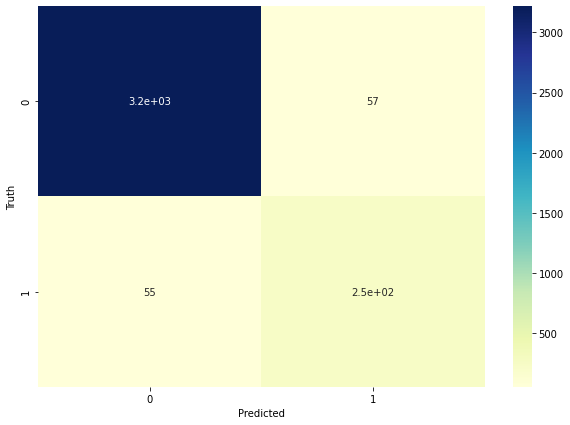

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(matrizC, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

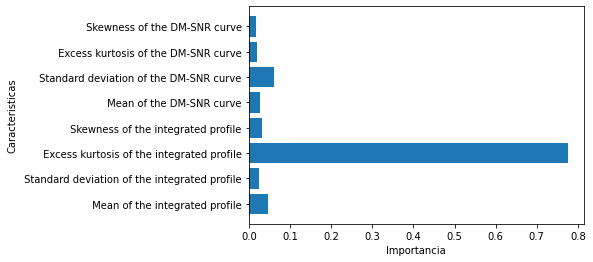

In [ ]:
caract = X.shape[1]
plt.barh(range(caract), arbolEntropy.feature_importances_)
plt.yticks(np.arange(caract), X.columns.values)
plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.show()

### **Random Forest**

In [ ]:
# Importando el random forest
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier() # Creando el modelo
randomForest.fit(X_train, y_train) # Ajustando el modelo

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print('Precisión modelo inicial train/test  {0:.6f}/{1:.6f}'
      .format(randomForest.score(X_train, y_train), randomForest.score(X_test, y_test)))

Precisión modelo inicial train/test  0.999930/0.979609


In [ ]:
y_predicted_randomForest = randomForest.predict(X_test)
matrizC = confusion_matrix(y_test, y_predicted_randomForest)
matrizC

array([[3253,   21],
       [  52,  254]])

Text(69.0, 0.5, 'Truth')

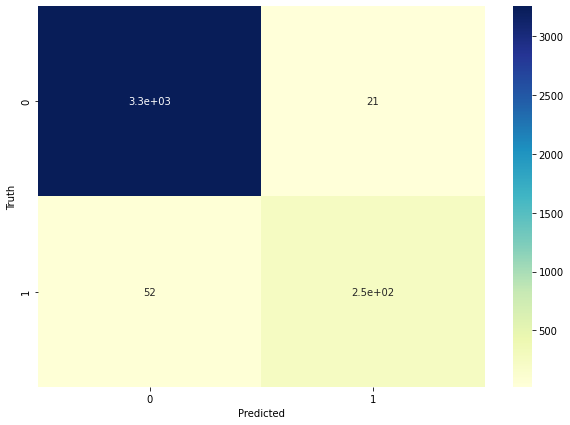

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(matrizC, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

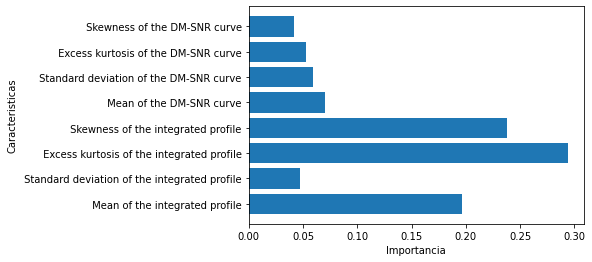

In [ ]:
caract = X.shape[1]
plt.barh(range(caract), randomForest.feature_importances_)
plt.yticks(np.arange(caract), X.columns.values)
plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.show()

### **AdaBoost**

In [ ]:
# Importando adaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

# Utilizando AdaBoost
adaBoost = AdaBoostClassifier(n_estimators=500, 
                              learning_rate=1.5)
# Ajustando los datos
adaBoost = adaBoost.fit(X_train, y_train)

In [ ]:
print('Precisión modelo inicial train/test  {0:.6f}/{1:.6f}'
      .format(adaBoost.score(X_train, y_train), adaBoost.score(X_test, y_test)))

Precisión modelo inicial train/test  0.985613/0.979050


In [ ]:
y_predicted_adaBoost = adaBoost.predict(X_test)
matrizC = confusion_matrix(y_test, y_predicted_adaBoost)
matrizC

array([[3253,   21],
       [  54,  252]])

Text(69.0, 0.5, 'Truth')

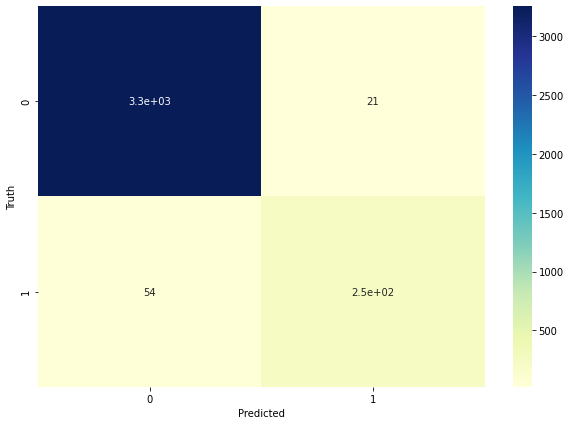

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(matrizC, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

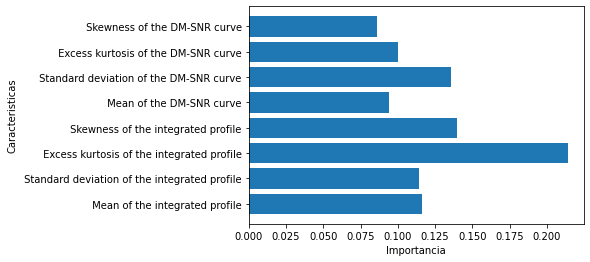

In [ ]:
caract = X.shape[1]
plt.barh(range(caract), adaBoost.feature_importances_)
plt.yticks(np.arange(caract), X.columns.values)
plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.show()

### **Gaussian Naive Bayes**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB

from sklearn.naive_bayes import GaussianNB

gNaiveBayes = GaussianNB()
gNaiveBayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print('Precisión modelo inicial train/test  {0:.6f}/{1:.6f}'
      .format(gNaiveBayes.score(X_train, y_train), gNaiveBayes.score(X_test, y_test)))

Precisión modelo inicial train/test  0.945314/0.947765


In [ ]:
#Matriz de Confusión
y_predicted_gNaiveBayes = gNaiveBayes.predict(X_test)
matrizC = confusion_matrix(y_test, y_predicted_gNaiveBayes)
matrizC

array([[3140,  134],
       [  53,  253]])

Text(69.0, 0.5, 'Truth')

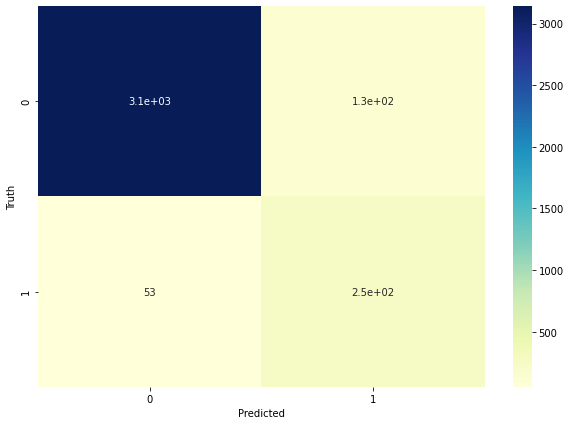

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(matrizC, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

### ***7.2 EVALUACIÓN***

In [ ]:
from sklearn.model_selection import cross_val_score

score_arbolGini = cross_val_score(arbolGini, X, Y, cv=100)
scoreFinal_arbolGini = score_arbolGini.mean()*100
print(scoreFinal_arbolGini)

96.77035339903334


In [ ]:
score_arbolEntropy = cross_val_score(arbolEntropy, X, Y, cv=100)
scoreFinal_arbolEntropy = score_arbolEntropy.mean()*100
print(scoreFinal_arbolEntropy)

96.8765614211286


In [ ]:
score_randomForest = cross_val_score(randomForest, X, Y, cv=100)
scoreFinal_randomForest = score_randomForest.mean()*100
print(scoreFinal_randomForest)


97.9771200803465


In [ ]:
score_adaBoost = cross_val_score(adaBoost, X, Y, cv=100)
scoreFinal_adaBoost = score_adaBoost.mean()*100
print(scoreFinal_adaBoost)


97.80955370033269


In [ ]:
score_gNaiveBayes = cross_val_score(gNaiveBayes, X, Y, cv=100)
scoreFinal_gNaiveBayes = score_gNaiveBayes.mean()*100
print(scoreFinal_gNaiveBayes)

94.5023225158496


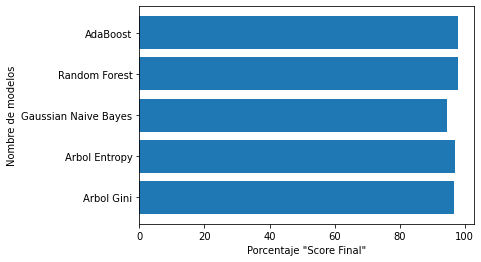

In [ ]:
import matplotlib.pyplot as plt

nombres = ['Arbol Gini','Arbol Entropy','Gaussian Naive Bayes','Random Forest','AdaBoost']
datos = [scoreFinal_arbolGini,scoreFinal_arbolEntropy,scoreFinal_gNaiveBayes,scoreFinal_randomForest,scoreFinal_adaBoost]
xx = range(len(datos))

plt.barh(xx, datos)
plt.yticks(xx, nombres)
plt.xlabel('Porcentaje "Score Final"')
plt.ylabel('Nombre de modelos')
plt.show()